<a href="https://colab.research.google.com/github/lhbsaldana/Data-Science-Projects/blob/main/Saldana_Prelims.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree Regression

In [ ]:
# import libraries 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#load data set 
dataset= pd.read_csv("/content/CalCOFI.csv")
dataset.head(3)

The `CalCOFI` dataset incorporates oceanographic data in the California Current from 1949 till present. It includes data on temperature, salinity, oxygen, phosphate, silicate, nitrate and nitrite, and chlorophyll. However we will be focusing on _salinity_ and _temperature_ for this regression demonstration. 

## Plot dataset

Text(0.5, 1.0, 'Scatter Plot of CalCOFI Data')

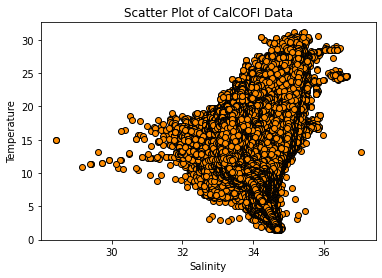

In [ ]:
X = dataset["Salnty"] #predictor variable
Y = dataset["T_degC"] #target variable

plt.scatter(X,Y, edgecolor="black", c="darkorange")
plt.xlabel("Salinity")
plt.ylabel("Temperature")
plt.title("Scatter Plot of CalCOFI Data")

# Data Cleaning

### Making a subset which have salinity and temperature 

In [ ]:
#making a subset of salinity and temp columns 
dataset = dataset[["Salnty","T_degC"]]
dataset.head(3)

,Salnty,T_degC
0,33.440,10.50
1,33.440,10.46
2,33.437,10.46


## Impute data with null values

In [ ]:
dataset.isnull().sum() #counts null values in dataset

Salnty    47354
T_degC    10963
dtype: int64

### Using mean imputation 

In [ ]:
from sklearn.impute import SimpleImputer
mean_imputer = SimpleImputer(strategy='mean')
mean_imputed = mean_imputer.fit_transform(dataset)
dataset = pd.DataFrame(mean_imputed, columns= dataset.columns)



In [ ]:
dataset.isnull().sum() 

Salnty    0
T_degC    0
dtype: int64

# Train-Test Split 

In [ ]:
from sklearn.model_selection import train_test_split
X = dataset["Salnty"]#predictor column 
Y = dataset["T_degC"]#target column 

X = X.values.reshape(-1,1)
Y = Y.values.reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state=7)

We reshape our dataset because we only have one feature 

# Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
 
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=3)
regr_3 = DecisionTreeRegressor(max_depth=4)
regr_4 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(x_train,y_train)
regr_2.fit(x_train,y_train)
regr_3.fit(x_train,y_train)
regr_4.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=5)


we use different `max_depth` values to determine which will make the model underfit/overfit the data 





# Predict 

In [ ]:
y1_pred = regr_1.predict(x_test)
y2_pred = regr_2.predict(x_test)
y3_pred = regr_3.predict(x_test)
y3_pred = regr_3.predict(x_test)
y4_pred = regr_4.predict(x_test)

y1_pred 
y2_pred
y3_pred
y4_pred

array([ 8.52989995,  7.29405854, 10.43063507, ...,  9.75136542,
        7.29405854,  7.29405854])

# Plot the results

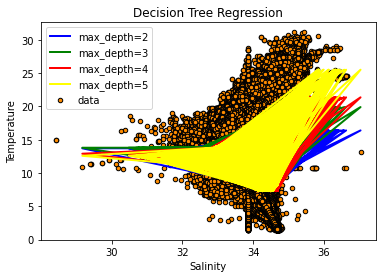

In [ ]:
plt.figure()
plt.scatter(X, Y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(x_test,y1_pred, color="blue", label="max_depth=2", linewidth=2)
plt.plot(x_test,y2_pred, color="green", label="max_depth=3", linewidth=2)
plt.plot(x_test,y3_pred, color="red", label="max_depth=4", linewidth=2)
plt.plot(x_test, y4_pred, color="yellow", label="max_depth=5", linewidth=2)
plt.xlabel("Salinity")
plt.ylabel("Temperature")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

# Evaluate Model
We use r^2 score to evaluate the model  

In [ ]:
from sklearn.metrics import r2_score

r2_depth2= r2_score(y_test,y1_pred)
r2_depth3= r2_score(y_test,y2_pred)
r2_depth4= r2_score(y_test,y3_pred)
r2_depth5= r2_score(y_test,y4_pred)

print(f"R_Square Score(max_depth=2):{r2_depth2}")
print(f"R_Square Score(max_depth=3):{r2_depth3}")
print(f"R_Square Score(max_depth=4):{r2_depth4}")
print(f"R_Square Score(max_depth=5):{r2_depth5}")

R_Square Score(max_depth=2):0.3872769377267419
R_Square Score(max_depth=3):0.42284875250511267
R_Square Score(max_depth=4):0.4311357206844848
R_Square Score(max_depth=5):0.4334502441975733
